In [125]:
%pylab inline
import numpy as np
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


In [126]:
class Linear(object):
    def __init__(self, n_in, n_out):
        self.W = np.random.randn(n_out, n_in)
        self.b = np.random.randn(n_out)
        
        self.output = np.zeros(n_out)
        
        self.gradInput = np.zeros(n_in)
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        self.output = np.dot(self.W, input) + self.b
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.dot(self.W.T, gradOutput)
        return self.gradInput
    
    def updateGradWeight(self, input, gradOutput):
        self.gradW = np.outer(gradOutput, input)
        self.gradb = gradOutput
        return (self.gradW, self.gradb)

In [127]:
class Sigmoid(object):
    def __init__(self, n_in):
        self.output = np.zeros(n_in)
        self.gradInput = np.zeros(n_in)
    
    def updateOutput(self, input):
        self.output = 1.0 / (1.0 + np.exp(-input))
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.output * (1 - self.output)
        return self.gradInput

In [128]:
class MSELoss(object):
    def __init__(self, n_in):
        self.output = 0.0
        self.gradInput = np.zeros(n_in)
        
    def updateOutput(self, input, target):
        diff = input - target
        self.output = np.dot(diff, diff) / diff.shape[0]
        return self.output
    
    def updateGradInput(self, input, target):
        self.gradInput = (2.0 / input.shape[0]) * (input - target)
        return self.gradInput

In [129]:
class Classifier(object):
    def __init__(self, n_in):
        self.linear = Linear(n_in, 50)
        self.sigmoid = Sigmoid(50)
        self.loss = MSELoss(1)
        self.linear2 = Linear( 50, 1 )
        self.sigmoid2 = Sigmoid( 1 )
        
    def forward(self, input, target = None):
        out1 = self.linear.updateOutput(input)
        out2 = self.sigmoid.updateOutput( out1 )
        out3 = self.linear2.updateOutput( out2 )
        out4 = self.sigmoid2.updateOutput( out3 )
        if target != None:
            self.loss.updateOutput(out4, target)
        return out4
    
    def backward(self, input, target):
        # Assumes forward has already been called with input
        back1 = self.loss.updateGradInput(self.sigmoid2.output, target)
        back2 = self.sigmoid2.updateGradInput(self.linear2.output, back1)
        back3 = self.linear2.updateGradInput( self.sigmoid.output, back2 )
        back4 = self.linear2.updateGradWeight( self.sigmoid.output, back2 )
        back5 = self.sigmoid.updateGradInput( self.linear.output, back3 )
        back6 = self.linear.updateGradInput(input, back5)
        grads = self.linear.updateGradWeight(input, back5)
        return grads
    
    def predict(self, input):
        out = self.forward(input)
        if out <= 0.5:
            return 0
        else:
            return 1

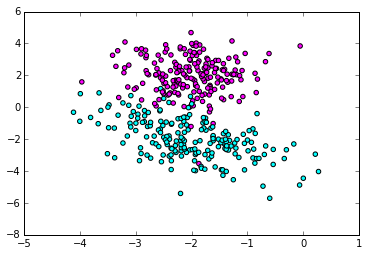

In [130]:
(easy_x, easy_y) = datasets.make_classification(n_samples=400, n_features = 2, n_informative = 2,
                             n_redundant = 0, n_repeated = 0, n_clusters_per_class=1, class_sep=2)
scatter(easy_x[:,0], easy_x[:,1], c = easy_y, cmap = 'cool')

In [131]:
classifier = Classifier(2)

[[-0.3208935  -1.8422109 ]
 [-0.71402475  0.56232878]
 [-0.29764346  0.45070409]
 [ 0.4915258  -0.88032292]
 [ 1.04431628 -1.46073807]
 [-0.27222396  0.592204  ]
 [ 0.15564306 -0.36358259]
 [-0.99745443 -1.30215445]
 [-0.80016433  0.37293098]
 [ 1.29502283 -0.20108796]
 [-1.18212491  0.41226723]
 [-0.86490888 -1.80941158]
 [ 0.71638379  0.81664098]
 [-0.53800677  0.14924127]
 [ 0.2183295  -0.47747424]
 [-1.75394317 -0.51867637]
 [ 1.39980806 -0.24308485]
 [ 0.87815136 -0.69480535]
 [ 2.29792841 -2.17963843]
 [ 0.05691665 -0.28145339]
 [-1.14223498 -0.67484113]
 [-0.29022003 -0.39995881]
 [-1.68875703  0.30615806]
 [ 0.57665475 -1.12077994]
 [ 0.37828549 -0.12892671]
 [-1.1995415   1.5475606 ]
 [-1.51469759  0.07717495]
 [ 1.44442534  0.29831871]
 [-0.2750339   0.42358723]
 [ 0.14463161 -1.4019002 ]
 [ 0.77999777  0.26432848]
 [ 0.77737859 -1.35799054]
 [-0.13085947  1.91272598]
 [-1.407883    0.72924992]
 [-1.46691683 -2.25869017]
 [-0.46516746 -1.30367452]
 [ 1.12001254 -0.46899059]
 

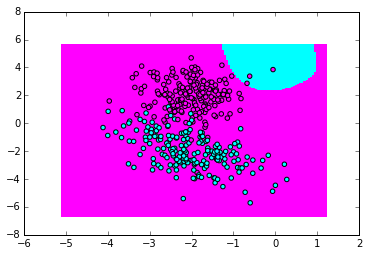

In [132]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(classifier.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='cool')

print classifier.linear.W, classifier.linear.b

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='cool')

In [133]:
# training
for i in range(1000):
    for j in range(easy_x.shape[0]):
        err = classifier.forward(easy_x[j], easy_y[j])
        grads = classifier.backward(easy_x[j], easy_y[j])
        
        classifier.linear.W -= 1e-3 * grads[0]
        classifier.linear.b -= 1e-3 * grads[1]

[[ 0.97595638 -0.74461311]
 [-0.5460757   0.80579119]
 [-0.6166725  -0.61199879]
 [ 1.0884144   0.22755697]
 [ 1.18287744 -1.28034161]
 [-0.15625579  0.72279929]
 [-0.39227276 -1.30922595]
 [-1.46943636 -0.69615765]
 [-0.72319712  0.58568308]
 [ 1.32081235  0.18917647]
 [-0.94956634  0.93324913]
 [-0.72297709 -1.98879347]
 [ 0.64797875  0.95289227]
 [-0.58090783  0.03993358]
 [-0.00976417 -0.77832922]
 [-1.86870371  0.07905722]
 [ 1.37558194 -0.37452512]
 [ 0.86763755 -0.71304816]
 [ 2.62049135 -1.82718553]
 [-0.25139847 -0.86252556]
 [-0.88526525 -1.0589651 ]
 [-0.23278268 -0.33375236]
 [-1.73843361 -0.13179834]
 [ 1.35079917  0.17502375]
 [ 0.10071115 -0.52714616]
 [-1.32462797  1.39080602]
 [-1.50869239  0.16582414]
 [ 1.26990831  0.65593303]
 [-0.65121397 -0.47597261]
 [ 0.36604696 -1.17579019]
 [ 0.58140129  0.83840761]
 [ 1.16151458 -0.91911102]
 [ 0.12574346  2.09133694]
 [-1.40838351  0.72758779]
 [-1.17477118 -2.41623839]
 [ 0.54022758 -0.25363909]
 [ 1.09013192 -0.54390162]
 

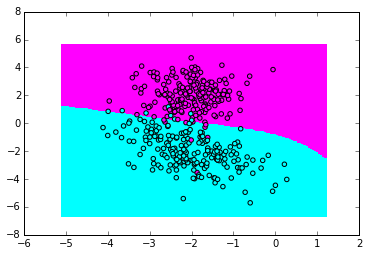

In [134]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(classifier.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='cool')

print classifier.linear.W, classifier.linear.b

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='cool')